### NEURAL NETWORK REGRESSION ON BIKE SHARING DEMAND  DATA SET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
warnings.filterwarnings('ignore')


In [2]:
training_df = pd.read_csv('train.csv')

In [3]:
training_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
training_df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [5]:
training_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
training_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

In [7]:
training_df.shape

(10886, 12)

In [8]:
training_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
training_df['datetime'] = training_df['datetime'].apply(pd.to_datetime)

In [10]:
training_df['Time'] = training_df["datetime"].dt.time

In [11]:
training_df["Month"] = training_df["datetime"].dt.month

In [12]:
training_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Time,Month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00:00:00,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01:00:00,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02:00:00,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03:00:00,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04:00:00,1


In [13]:
training_df.drop('datetime',axis=1 ,inplace=True)

#### printing all the valid color names

In [14]:
all_color = plt.colormaps()
print(all_color)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

In [15]:
training_df.drop('Time',axis=1,inplace=True)

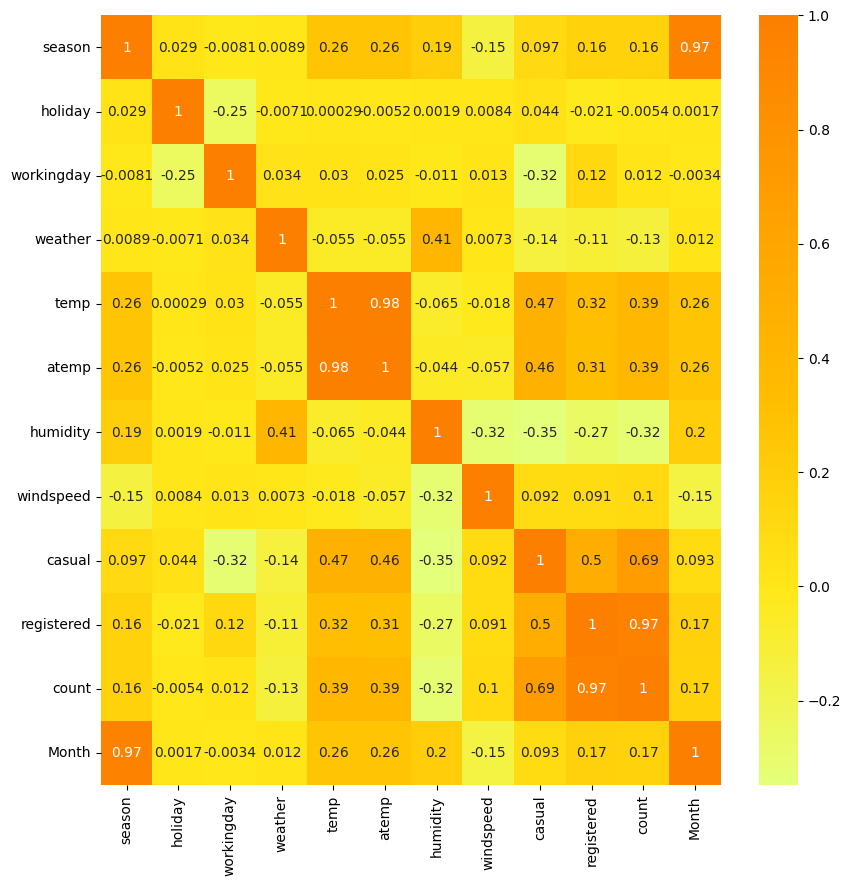

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(training_df.corr() ,annot =True,cmap="Wistia")
plt.show()

In [17]:
# training_df.drop("datetime",axis=1,inplace=True)

In [18]:
order = ['Month',"season",	"holiday",	"workingday",	"weather",	"temp", "atemp", "humidity", "windspeed", "casual",	"registered","count"]
training_df = training_df[order +[col for col in training_df if col not in order]]

In [19]:
training_df.drop("atemp",axis=1,inplace=True)

In [20]:
training_df.head(5)

,Month,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,1,1,0,0,1,9.84,81,0.0,3,13,16
1,1,1,0,0,1,9.02,80,0.0,8,32,40
2,1,1,0,0,1,9.02,80,0.0,5,27,32
3,1,1,0,0,1,9.84,75,0.0,3,10,13
4,1,1,0,0,1,9.84,75,0.0,0,1,1


In [21]:
training_df["count"].value_counts()

count
5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

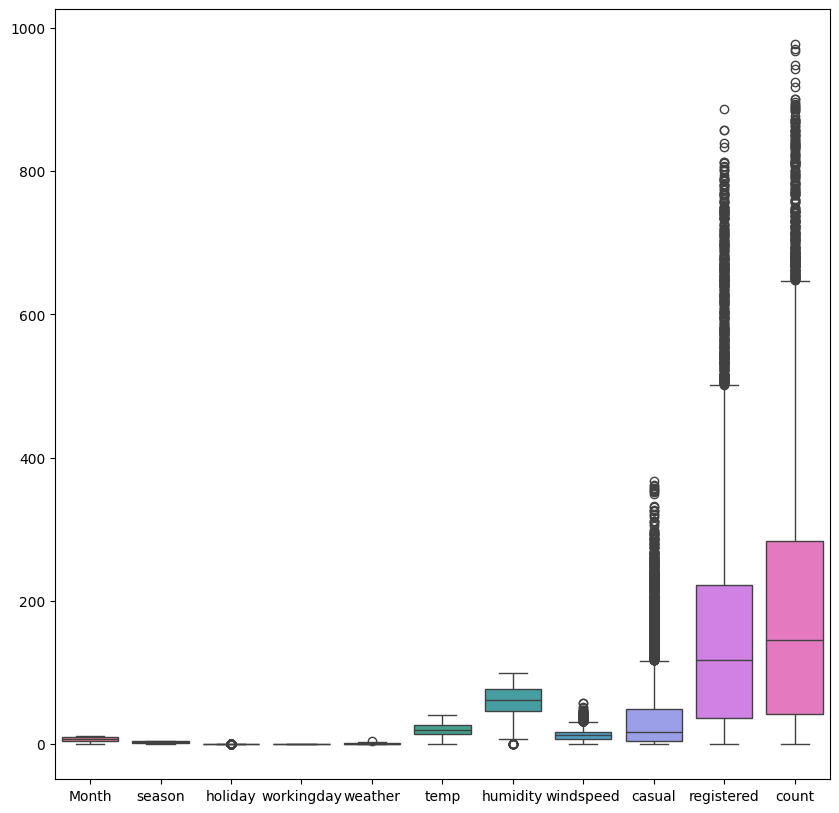

In [22]:
plt.figure(figsize=(10,10))
sns.boxplot(data = training_df)
plt.show()

In [23]:
def find_outlier(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    outliers = series[((series < (q1 - 1.5 * iqr)) | (series > (q3 + 1.5 * iqr)))]
    return outliers


In [25]:
windspeed_outlier = find_outlier(training_df['windspeed'])
print("number of windspeed outliers:" +  str(len(windspeed_outlier)))
print("max outlier values:" + str(windspeed_outlier.max()))
print("min outlier values:" + str(windspeed_outlier.min()))

print("---------------------------------------------------")

casual_outlier = find_outlier(training_df['casual'])
print("number of casual outliers:" +  str(len(casual_outlier)))
print("max outlier values:" + str(casual_outlier.max()))
print("min outlier values:" + str(casual_outlier.min()))

print("---------------------------------------------------")

registered_outlier = find_outlier(training_df['registered'])
print("number of registered outliers:" +  str(len(registered_outlier)))
print("max outlier values:" + str(registered_outlier.max()))
print("min outlier values:" + str(registered_outlier.min()))

print("---------------------------------------------------")

count_outlier = find_outlier(training_df['count'])
print("number of count outliers:" +  str(len(count_outlier)))
print("max outlier values:" + str(count_outlier.max()))
print("min outlier values:" + str(count_outlier.min()))


number of windspeed outliers:227
max outlier values:56.9969
min outlier values:32.9975
---------------------------------------------------
number of casual outliers:749
max outlier values:367
min outlier values:117
---------------------------------------------------
number of registered outliers:423
max outlier values:886
min outlier values:502
---------------------------------------------------
number of count outliers:300
max outlier values:977
min outlier values:648


In [26]:
# Outlier Treatment
training_df.drop(training_df[training_df['windspeed'] > 50].index, inplace = True)
training_df.drop(training_df[training_df['casual'] > 170].index, inplace = True)
training_df.drop(training_df[training_df['registered'] > 400].index, inplace = True)
training_df.drop(training_df[training_df['count'] > 600].index, inplace = True)

In [27]:
training_df.shape

(9759, 11)